In [43]:
import pandas as pd

df = pd.read_csv("/content/WELFake_Dataset.csv", on_bad_lines="warn")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [44]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [46]:
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [47]:
df.dropna()
df.count()

,0
Unnamed: 0,72134
title,71576
text,72095
label,72134


In [48]:
df.drop_duplicates()
df.count()

,0
Unnamed: 0,72134
title,71576
text,72095
label,72134


In [49]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [53]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure resources are available
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Define a simple cleaning function
def preprocess_text(text):
    # Ensure text is a string and lowercase it
    tokens = word_tokenize(str(text).lower())
    # Filter out stopwords and non-alphabetic tokens (like punctuation)
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# # Apply to the entire column
# df['filtered_tokens'] = df['text'].apply(preprocess_text)

# print(df[['text', 'filtered_tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
df['title'] = df['title'].fillna('untitled')

In [56]:
nltk.download('punkt_tab')

# Create a 'full_content' column
df['content'] = df['title'].fillna('') + " " + df['text'].fillna('')

# Preprocess the combined column
df['tokens'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [62]:
# 3. Create the missing column (This fixes the KeyError!)
df['filtered_tokens'] = df['text'].apply(preprocess_text)

# Now you can access it:
print(df['filtered_tokens'].head())

0    [comment, expected, barack, obama, members, fu...
1                      [post, votes, hillary, already]
2    [demonstrators, gathered, last, night, exercis...
3    [dozen, politically, active, pastors, came, pr...
4    [sarmat, missile, dubbed, satan, replace, flie...
Name: filtered_tokens, dtype: object


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Join tokens back into single strings (Scikit-learn expects strings, not lists)
df['processed_text'] = df['filtered_tokens'].apply(lambda x: " ".join(x))

# 2. Initialize the Vectorizer
# max_features=5000 limits the vocabulary to the top 5k words to save memory
tfidf = TfidfVectorizer(max_features=5000)

# 3. Transform the text into a numerical matrix
X = tfidf.fit_transform(df['processed_text'])
y = df['label']

print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (72134, 5000)


In [64]:
# Join the list of words into a single string for the model
df['clean_string'] = df['filtered_tokens'].apply(lambda x: " ".join(x))

In [65]:
df

,Unnamed: 0,title,text,label,content,tokens,processed_text,filtered_tokens,clean_string
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,"[law, enforcement, high, alert, following, thr...",comment expected barack obama members fukyofla...,"[comment, expected, barack, obama, members, fu...",comment expected barack obama members fukyofla...
1,1,untitled,Did they post their votes for Hillary already?,1,untitled Did they post their votes for Hillary...,"[untitled, post, votes, hillary, already]",post votes hillary already,"[post, votes, hillary, already]",post votes hillary already
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"[unbelievable, obama, attorney, general, says,...",demonstrators gathered last night exercising c...,"[demonstrators, gathered, last, night, exercis...",demonstrators gathered last night exercising c...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...","[bobby, jindal, raised, hindu, uses, story, ch...",dozen politically active pastors came private ...,"[dozen, politically, active, pastors, came, pr...",dozen politically active pastors came private ...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,"[satan, russia, unvelis, image, terrifying, ne...",sarmat missile dubbed satan replace flies mile...,"[sarmat, missile, dubbed, satan, replace, flie...",sarmat missile dubbed satan replace flies mile...
...,...,...,...,...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....,"[russians, steal, research, trump, hack, democ...",washington reuters hackers believed working ru...,"[washington, reuters, hackers, believed, worki...",washington reuters hackers believed working ru...
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...,"[watch, giuliani, demands, democrats, apologiz...",know fantasyland republicans never questioned ...,"[know, fantasyland, republicans, never, questi...",know fantasyland republicans never questioned ...
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...,"[migrants, refuse, leave, train, refugee, camp...",migrants refuse leave train refugee camp hunga...,"[migrants, refuse, leave, train, refugee, camp...",migrants refuse leave train refugee camp hunga...
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...,"[trump, tussle, gives, unpopular, mexican, lea...",mexico city reuters donald trump combative sty...,"[mexico, city, reuters, donald, trump, combati...",mexico city reuters donald trump combative sty...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       72134 non-null  int64 
 1   title            72134 non-null  object
 2   text             72095 non-null  object
 3   label            72134 non-null  int64 
 4   content          72134 non-null  object
 5   tokens           72134 non-null  object
 6   processed_text   72134 non-null  object
 7   filtered_tokens  72134 non-null  object
 8   clean_string     72134 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.0+ MB


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Define X (features) and y (target)
X = df['clean_string']
y = df['label']

# 2. Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorize (Turn text into numbers)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Training data shape: {X_train_tfidf.shape}")

Training data shape: (57707, 5000)


In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_string'], df['label'], test_size=0.2, random_state=42
)

# 2. Vectorize (Turn text into a 5,000-word importance matrix)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=5000)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# --- MODEL A: Multinomial Naive Bayes ---
nb_model = MultinomialNB()
nb_model.fit(tfidf_train, y_train)
y_pred_nb = nb_model.predict(tfidf_test)

# --- MODEL B: Passive Aggressive Classifier ---
pa_model = PassiveAggressiveClassifier(max_iter=50)
pa_model.fit(tfidf_train, y_train)
y_pred_pa = pa_model.predict(tfidf_test)

# 3. Show Results
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2%}")
print(f"Passive Aggressive Accuracy: {accuracy_score(y_test, y_pred_pa):.2%}")

Naive Bayes Accuracy: 83.48%
Passive Aggressive Accuracy: 93.19%


In [69]:
new_headline = ["BREAKING: Aliens found living in the moon according to local baker"]
new_vec = tfidf_vectorizer.transform(new_headline)
prediction = pa_model.predict(new_vec)
print(f"Prediction: {'Real' if prediction[0] == 1 else 'Fake'}")

Prediction: Real


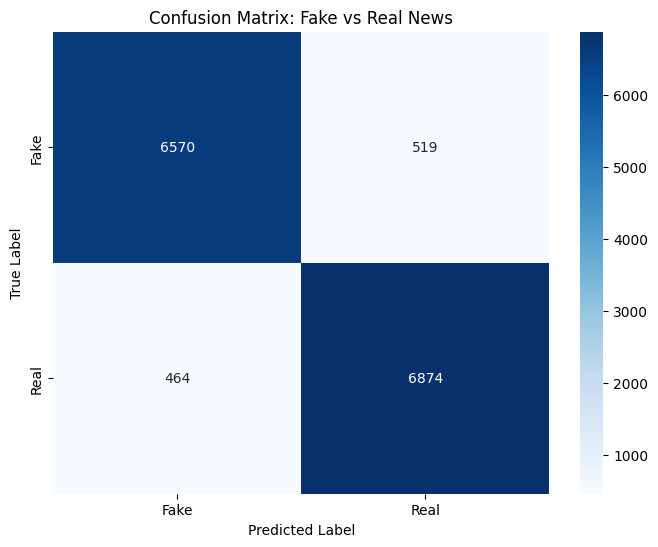

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Generate the matrix
# Using the Passive Aggressive predictions (y_pred_pa) from the previous step
cm = confusion_matrix(y_test, y_pred_pa)

# 2. Plotting the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Fake vs Real News')
plt.show()

In [71]:
# Find the indices where the prediction was wrong
errors = (y_test != y_pred_pa)
error_df = df.iloc[y_test[errors].index]

# Look at the first 5 headlines the model got wrong
print(error_df['title'].head())

24096    'The only other option': Bernie Sanders backer...
30738    WAY TO GO! PRESIDENT TRUMP Called Husband Of F...
5246     SB Nation Claims New England Patriots Have a ’...
69730    Kelly Ripa’s Absence From ‘Live’ Points to Ran...
18388    The feds probably won't dismantle the Ferguson...
Name: title, dtype: object


In [72]:
# Get the feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients (weights) from the PA model
# For binary classification, higher positive values = one class, lower negative = other
coefs = pd.Series(pa_model.coef_[0], index=feature_names)

print("Top words indicating 'Real' News:")
print(coefs.sort_values(ascending=False).head(10))

print("\nTop words indicating 'Fake' News:")
print(coefs.sort_values(ascending=True).head(10))

Top words indicating 'Real' News:
image           32.366676
oct             29.161858
getty           21.426026
flickr          20.830332
filessupport    20.232269
october         20.025389
donate          19.493716
ny              16.502558
wire            14.997890
screenshot      14.869850
dtype: float64

Top words indicating 'Fake' News:
reuters        -65.554718
com            -40.435414
pic            -22.658393
follow         -22.640483
twitter        -13.537493
said           -12.757801
complicated    -10.541553
contributor    -10.524313
deeply         -10.370456
acknowledged    -9.680799
dtype: float64


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Expand your stop words list to include the "leakage" terms we found
leakage_words = {'reuters', 'getty', 'image', 'flickr', 'screenshot', 'october', 'oct', 'pic', 'twitter', 'com'}
enhanced_stops = list(stop_words.union(leakage_words))

# 2. Re-Vectorize without the "cheating" words
tfidf_clean = TfidfVectorizer(stop_words=enhanced_stops, max_features=5000)
X_tfidf_clean = tfidf_clean.fit_transform(df['clean_string'])

# 3. Re-split and Re-train
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_tfidf_clean, df['label'], test_size=0.2, random_state=42
)

pa_model_clean = PassiveAggressiveClassifier(max_iter=50)
pa_model_clean.fit(X_train_c, y_train_c)

# 4. Check the new "Honest" Accuracy
clean_acc = pa_model_clean.score(X_test_c, y_test_c)
print(f"New 'Clean' Accuracy: {clean_acc:.2%}")

New 'Clean' Accuracy: 92.11%


In [75]:
# Get the new feature names and coefficients
feature_names_clean = tfidf_clean.get_feature_names_out()
coefs_clean = pd.Series(pa_model_clean.coef_[0], index=feature_names_clean)

print("--- TOP LINGUISTIC INDICATORS ---")
print("\nTop words for 'Real' News (Credibility markers):")
print(coefs_clean.sort_values(ascending=False).head(10))

print("\nTop words for 'Fake' News (Sensationalism markers):")
print(coefs_clean.sort_values(ascending=True).head(10))

--- TOP LINGUISTIC INDICATORS ---

Top words for 'Real' News (Credibility markers):
via         55.468356
donate      20.277143
ny          16.432436
wire        15.005013
http        14.696068
caller      13.636160
entire      11.960475
november    11.127714
rt          11.084188
images      10.379641
dtype: float64

Top words for 'Fake' News (Sensationalism markers):
follow       -32.469327
said         -14.455471
thursday     -11.521959
rohingya     -11.424076
tuesday      -11.281512
beirut       -10.913158
inc          -10.556104
washington    -9.773464
monday        -9.763122
investor      -9.715715
dtype: float64


In [76]:
from sklearn.model_selection import cross_val_score

# This will take a minute as it trains the model 5 times
scores = cross_val_score(pa_model_clean, X_tfidf_clean, df['label'], cv=5)

print(f"All 5 Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2%}")
print(f"Standard Deviation: {scores.std():.4f}")

All 5 Scores: [0.92098149 0.91356484 0.92056561 0.91730783 0.92423402]
Mean Accuracy: 91.93%
Standard Deviation: 0.0036


In [77]:
import joblib

# Save the model
joblib.dump(pa_model_clean, 'fake_news_model.pkl')

# Save the vectorizer (crucial!)
joblib.dump(tfidf_clean, 'tfidf_vectorizer.pkl')

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


In [78]:
# Ladies and gentleman GoodNight!